In [150]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# The Perceptron

In [151]:
class perceptron:
  
  def __init__(self, input_dimension, learning_rate=0.1, activation_threshold=0.0, weights=None):
    self.in_dim = input_dimension
    self.weights = weights if weights else [0 for i in range(self.in_dim + 1)]  #Add one weight for the bias
    self.lr = learning_rate
    self.act_thresh = activation_threshold
  
  def _forward(self, x):
    sum = 0
    print("Summing weights * inputs:")
    for i, x_i in enumerate(x):
      print(x_i, " * ", self.weights[i], " = ", x_i * self.weights[i])
      sum += x_i * self.weights[i]
    print("Sum = ", sum)
    activation = 0 if sum < self.act_thresh else 1
    return activation
  
  def _update_weights(self, x, predicted, expected):
    for i in range(len(self.weights)):
      self.weights[i] = self.weights[i] + self.lr * (expected - predicted) * x[i]
  
  def train(self, xs, ys, num_epochs=5):
    bias_xs = copy.deepcopy(xs)  #Add a bias
    [bias_xs[i].insert(0, 1) for i in range(len(bias_xs))]
    for i in range(num_epochs):
      for j in range(len(ys)):
        pred = self._forward(bias_xs[j])
        self.print_perceptron(bias_xs[j])
        print("Pred = ", pred, "Expected = ", ys[j])
        self._update_weights(bias_xs[j], pred, ys[j])

  def inference(self, xs):
    bias_xs = copy.deepcopy(xs)  #Add a bias
    [bias_xs[i].insert(0, 1) for i in range(len(bias_xs))]
    preds = []
    for x in bias_xs:
      pred = self._forward(x)
      preds.append(pred)
      
    return preds
  
  def print_perceptron(self, inp=None):
    primer1 = ""
    if inp!=None:
      primer1 = " ___\t "
    ret_str = primer1 + " ___\n"
    for x, w in enumerate(self.weights):
      primer2 = ""
      if inp!=None:
        primer2 = "|{}|----".format(round(inp[x]/1.0, 2))
      if x < int(len(self.weights)/2):
        bi_tx1 = "-"
        if x == 0:
          bi_tx1 = 'b'
        if int(len(self.weights)/2) - x == 1:
          ins = "\t"
          if inp != None:
            ins = "  "
          ret_str += primer2+"|{}|{}---\\\n ___\t{}___\n".format(round(w/1.0, 2), bi_tx1, ins)
        else:
          ret_str += primer2+"|{}|b---\\\n ___\n".format(round(w/1.0, 2))
      elif x == int(len(self.weights)/2):
          ret_str += primer2+"|{}|-----|--> |{}|\n ___\n".format(round(w/1.0, 2), round(self._forward(inp)/1.0, 2))
      elif x > int(len(self.weights)/2):
          if x == len(self.weights)-1:
            #if inp != None:
              #primer2 = "|{}|----".format(round(inp[x]/1.0, 2))
            ret_str += primer2+"|{}|----/\n".format(round(w/1.0, 2))
          else:
            ret_str += primer2+"|{}|----/\n ___\n".format(round(w/1.0, 2))

    print(str(ret_str))

In [152]:
perceptron_model = perceptron(2, .1, .5, [0, 0.5, 0.5])
perceptron_model2 = perceptron(3, .5, .5, [0, 0.9, 0.9, 0.6])
perceptron_model3 = perceptron(4, .5, .5, [0, 0.9, 0.9, 0.6, 0.2])

In [153]:
perceptron_model.print_perceptron([1,1,1])
print()
perceptron_model2.print_perceptron([1,1,1,1])
print()
perceptron_model3.print_perceptron([1,1,1,1,0])

Summing weights * inputs:
1  *  0  =  0
1  *  0.5  =  0.5
1  *  0.5  =  0.5
Sum =  1.0
 ___	  ___
|1.0|----|0.0|b---\
 ___	  ___
|1.0|----|0.5|-----|--> |1.0|
 ___
|1.0|----|0.5|----/


Summing weights * inputs:
1  *  0  =  0
1  *  0.9  =  0.9
1  *  0.9  =  0.9
1  *  0.6  =  0.6
Sum =  2.4
 ___	  ___
|1.0|----|0.0|b---\
 ___
|1.0|----|0.9|----\
 ___	  ___
|1.0|----|0.9|-----|--> |1.0|
 ___
|1.0|----|0.6|----/


Summing weights * inputs:
1  *  0  =  0
1  *  0.9  =  0.9
1  *  0.9  =  0.9
1  *  0.6  =  0.6
0  *  0.2  =  0.0
Sum =  2.4
 ___	  ___
|1.0|----|0.0|b---\
 ___
|1.0|----|0.9|----\
 ___	  ___
|1.0|----|0.9|-----|--> |1.0|
 ___
|1.0|----|0.6|----/
 ___
|0.0|----|0.2|----/



In [154]:
x = [[0,-2], [1, 1], [2, 2], [3,4], [4, 4], [4, 6], [5, 5]]
y = [1, 0, 0, 0, 1, 0, 1]

#x = [[1, 1], [2, 2], [3,4], [4, 4], [5, 5]]
#y = [0, 0, 0, 1, 1]

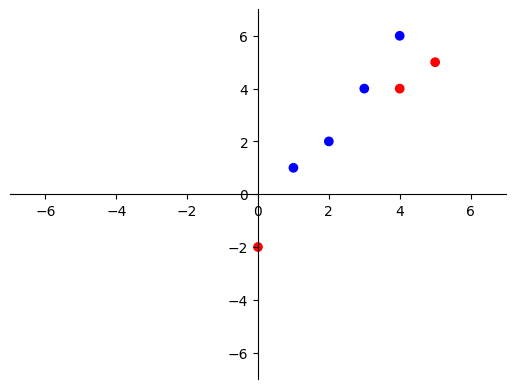

In [155]:
colors = ["b", "r"]
fig, ax = plt.subplots(1,1)
ax.scatter([xpos[0] for xpos in x], [ypos[1] for ypos in x], color=[colors[yy] for yy in y])
ax.set_ylim(ymin=-7, ymax=7)
ax.set_xlim(xmin=-7, xmax=7)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [156]:
perceptron_model.train(x, y, 10)

Summing weights * inputs:
1  *  0  =  0
0  *  0.5  =  0.0
-2  *  0.5  =  -1.0
Sum =  -1.0
Summing weights * inputs:
1  *  0  =  0
0  *  0.5  =  0.0
-2  *  0.5  =  -1.0
Sum =  -1.0
 ___	  ___
|1.0|----|0.0|b---\
 ___	  ___
|0.0|----|0.5|-----|--> |0.0|
 ___
|-2.0|----|0.5|----/

Pred =  0 Expected =  1
Summing weights * inputs:
1  *  0.1  =  0.1
1  *  0.5  =  0.5
1  *  0.3  =  0.3
Sum =  0.8999999999999999
Summing weights * inputs:
1  *  0.1  =  0.1
1  *  0.5  =  0.5
1  *  0.3  =  0.3
Sum =  0.8999999999999999
 ___	  ___
|1.0|----|0.1|b---\
 ___	  ___
|1.0|----|0.5|-----|--> |1.0|
 ___
|1.0|----|0.3|----/

Pred =  1 Expected =  0
Summing weights * inputs:
1  *  0.0  =  0.0
2  *  0.4  =  0.8
2  *  0.19999999999999998  =  0.39999999999999997
Sum =  1.2
Summing weights * inputs:
1  *  0.0  =  0.0
2  *  0.4  =  0.8
2  *  0.19999999999999998  =  0.39999999999999997
Sum =  1.2
 ___	  ___
|1.0|----|0.0|b---\
 ___	  ___
|2.0|----|0.4|-----|--> |1.0|
 ___
|2.0|----|0.2|----/

Pred =  1 Expected 

In [157]:
inference_preds = perceptron_model.inference([[1,1],[2,2], [3,4], [4,4],[5,5]])
print("Inf: ", inference_preds)

Summing weights * inputs:
1  *  -0.1  =  -0.1
1  *  0.8  =  0.8
1  *  -0.5000000000000002  =  -0.5000000000000002
Sum =  0.19999999999999984
Summing weights * inputs:
1  *  -0.1  =  -0.1
2  *  0.8  =  1.6
2  *  -0.5000000000000002  =  -1.0000000000000004
Sum =  0.49999999999999956
Summing weights * inputs:
1  *  -0.1  =  -0.1
3  *  0.8  =  2.4000000000000004
4  *  -0.5000000000000002  =  -2.000000000000001
Sum =  0.2999999999999994
Summing weights * inputs:
1  *  -0.1  =  -0.1
4  *  0.8  =  3.2
4  *  -0.5000000000000002  =  -2.000000000000001
Sum =  1.0999999999999992
Summing weights * inputs:
1  *  -0.1  =  -0.1
5  *  0.8  =  4.0
5  *  -0.5000000000000002  =  -2.500000000000001
Sum =  1.399999999999999
Inf:  [0, 0, 0, 1, 1]


2.7142857142857144
2.857142857142857


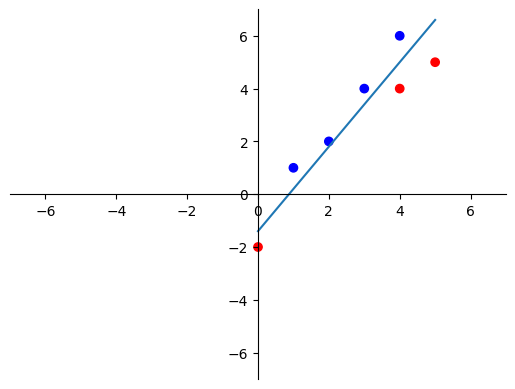

In [172]:
colors = ["b", "r"]
fig, ax = plt.subplots(1,1)
ax.scatter([xpos[0] for xpos in x], [ypos[1] for ypos in x], color=[colors[yy] for yy in y])
ax.set_ylim(ymin=-7, ymax=7)
ax.set_xlim(xmin=-7, xmax=7)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

b = perceptron_model.weights[0]
w1 = perceptron_model.weights[1]
w2 = perceptron_model.weights[2]

slope = -(b/w2)/(b/w1)

def eq(x,xmean, ymean):
    #return (-(b / w2) / (b / w1))*(x-xmean/2) + (-b / w2) + ymean/2
    return (-(w1/w2)*(x) + (-b-1.5))

xmean = sum([t[0] for t in x])/len(x)
ymean = sum([t[1] for t in x])/len(x)
print(xmean)
print(ymean)
ax.plot(range(6), [eq(x1,xmean,ymean) for x1 in range(6)])
#ax.plot([0,w2/w1],[-w2/w1,0])
# [0.2,0.2]
# [-0.5]

# [0.2,-0.1]
# [-0.29]

plt.show()

# The Multi-layer Perceptron

We will build a multi-layer perceptron using our previously defined perceptron class. 

However, we will slightly modify our previous perceptron to leverage numpy, because the matrix operations begin to get more complex in a MLP.

In [159]:
class Perceptron_NP:
  
  def __init__(self, input_dimension, learning_rate=0.1, activation_threshold=0.0, weights=None):
    self.in_dim = input_dimension
    if weights.all() == None:
      self.weights = np.array([0 for i in range(self.in_dim + 1)])  #Add one weight for the bias
    else:
      self.weights = weights
    self.lr = learning_rate
    self.act_thresh = activation_threshold
  
  def _forward(self, x):
    sum = 0
    print("Summing weights * inputs:")
    for i, x_i in enumerate(x):
      print(x_i, " * ", self.weights[i], " = ", x_i * self.weights[i])
      sum += x_i * self.weights[i]
    print("Sum = ", sum)
    activation = 0 if sum < self.act_thresh else 1
    return activation
  
  def _update_weights(self, x, predicted, expected):
    for i in range(len(self.weights)):
      self.weights[i] = self.weights[i] + self.lr * (expected - predicted) * x[i]
  
  def train(self, xs, ys, num_epochs=5):
    bias_xs = copy.deepcopy(xs)  #Add a bias
    [bias_xs[i].insert(0, 1) for i in range(len(bias_xs))]
    for i in range(num_epochs):
      for j in range(len(ys)):
        pred = self._forward(bias_xs[j])
        self.print_perceptron(bias_xs[j])
        print("Pred = ", pred, "Expected = ", ys[j])
        self._update_weights(bias_xs[j], pred, ys[j])

  def inference(self, xs):
    bias_xs = copy.deepcopy(xs)  #Add a bias
    [bias_xs[i].insert(0, 1) for i in range(len(bias_xs))]
    preds = []
    for x in bias_xs:
      pred = self._forward(x)
      preds.append(pred)
      
    return preds
  
  def print_perceptron(self, inp=None):
    primer1 = ""
    if inp!=None:
      primer1 = " ___\t "
    ret_str = primer1 + " ___\n"
    for x, w in enumerate(self.weights):
      primer2 = ""
      if inp!=None:
        primer2 = "|{}|----".format(round(inp[x]/1.0, 2))
      if x < int(len(self.weights)/2):
        bi_tx1 = "-"
        if x == 0:
          bi_tx1 = 'b'
        if int(len(self.weights)/2) - x == 1:
          ins = "\t"
          if inp != None:
            ins = "  "
          ret_str += primer2+"|{}|{}---\\\n ___\t{}___\n".format(round(w/1.0, 2), bi_tx1, ins)
        else:
          ret_str += primer2+"|{}|b---\\\n ___\n".format(round(w/1.0, 2))
      elif x == int(len(self.weights)/2):
          ret_str += primer2+"|{}|-----|--> |{}|\n ___\n".format(round(w/1.0, 2), round(self._forward(inp)/1.0, 2))
      elif x > int(len(self.weights)/2):
          if x == len(self.weights)-1:
            #if inp != None:
              #primer2 = "|{}|----".format(round(inp[x]/1.0, 2))
            ret_str += primer2+"|{}|----/\n".format(round(w/1.0, 2))
          else:
            ret_str += primer2+"|{}|----/\n ___\n".format(round(w/1.0, 2))

    print(str(ret_str))

In [160]:
class MLP():
    def __init__(self, in_dim, hid_dim, num_layers, out_dim, lr, act_thresh):
        # need to set up layers
        # make sure that each input_dimension is what goes to first layer perceptrons
        # each input weight's default initialization is 0.5
        init_weights = np.array([0.5 for i in range(in_dim)])
        # first layer of hidden needs to be input_dimention weights, but after needs hid_dim weights
        # last layer of hidden needs to be hid_dim weights, but only with the count of out_dim
        self.hidden_layers = np.array([np.array([Perceptron_NP(in_dim,lr,act_thresh,init_weights) for i in range(hid_dim)])])
        self.hidden_layers = np.append(self.hidden_layers, np.array([np.array([Perceptron_NP(hid_dim,lr,act_thresh,init_weights) for i in range(hid_dim)]) for y in range(num_layers-2)]), axis=0)
        self.output_layer = np.array([Perceptron_NP(hid_dim,lr,act_thresh,init_weights) for i in range(out_dim)])
    def _forward(self, x):
        # pass through first layer of the MLP
        out = [perc._forward(xi) for xi in x for perc in self.hidden_layers[0]]
        #print(self.hidden_layers)
        out = np.array([list(map(float,out))])
        print("out0: ", out)
        # pass through the layers 1->n-1
        #print(self.hidden_layers[1:])
        for idx, layer in enumerate(self.hidden_layers[1:]):
            out = [[perc._forward(out) for perc in layer]]
            print("out{}: ".format(idx+1), out)
        
        out = [[perc._forward(out) for perc in self.hidden_layers[-1]]]
        print("final out: ", out)
        pass
    def _update_weights():
        pass
    def train(self, xs, ys, num_epochs=5):
        pass
    def inference(self, xs):
        pass
    def print_mlp(self, inp=None):
        pass

In [161]:
mlp = MLP(2,5,3,2,0.1,0.5)

In [162]:
#print(mlp.input_layer.shape)
#print([[p.weights for p in layer] for layer in mlp.hidden_layers])
print(mlp.hidden_layers.shape)
print(mlp.output_layer.shape)

(2, 5)
(2,)


In [163]:
input = [[0.3,0.3]]
mlp._forward(input)

Summing weights * inputs:
0.3  *  0.5  =  0.15
0.3  *  0.5  =  0.15
Sum =  0.3
Summing weights * inputs:
0.3  *  0.5  =  0.15
0.3  *  0.5  =  0.15
Sum =  0.3
Summing weights * inputs:
0.3  *  0.5  =  0.15
0.3  *  0.5  =  0.15
Sum =  0.3
Summing weights * inputs:
0.3  *  0.5  =  0.15
0.3  *  0.5  =  0.15
Sum =  0.3
Summing weights * inputs:
0.3  *  0.5  =  0.15
0.3  *  0.5  =  0.15
Sum =  0.3
out0:  [[0. 0. 0. 0. 0.]]
Summing weights * inputs:
[0. 0. 0. 0. 0.]  *  0.5  =  [0. 0. 0. 0. 0.]
Sum =  [0. 0. 0. 0. 0.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()